In [1]:
import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt

import numpy as np

from random import randint

from terrain import *
from droplet import *

import time

In [5]:
# Terrain parameters
# shape = height, width = 256, 256
# scale = 400.0
shape = height, width = 256,256
scale = 250


pnoise_kwargs = {"octaves":4,           # Number of noise layers
                 "persistence": 0.6,    # Amplitude of each successive octave
                 "lacunarity": 1.8,     # Frequency multiplier between octaves
                 # "base": 979,         # Base seed for the noise (optional)
                 # "base": 686,
                 "base": 74,
                 # "base": np.random.randint(1000)
                 }           

terrain = get_terrain(shape, scale, pnoise_kwargs)

# Gradiente
grad_terrain = np.gradient(terrain)


# colormap
plt.imshow(terrain, cmap='terrain')
plt.title("Colored Terrain Elevation")
plt.colorbar()

# surface plot
# ax = plt.figure().add_subplot(projection='3d')
# X, Y = np.meshgrid(np.linspace(0,width, width),np.linspace(0,height, height))
# ax.plot_surface(X,Y, terrain, cmap='terrain', linewidth=0, antialiased=False)

plt.show()

In [ ]:
kernel = np.array([[1,2,1],
                   [2,4,2],
                   [1,2,1]]) / 16


N_droplets = 200000
batch_size = 200

max_droplet_steps = 300

terrain_copy = terrain.copy()

paths = []

step_times = []
batch_times = []
steps = []
speeds = []

pepe = droplet(height, width, kernel)

for i in range(N_droplets//batch_size):
        time_start = time.process_time()
        
        # Hago un Batch antes de actualizar el mapa de gradiente
        for j in range(batch_size):
                pepe.reset()
                i=0
                while pepe.inbounds and i < max_droplet_steps:

                        temp_time_start = time.process_time()  

                        pepe.step(terrain = terrain_copy, grad_terrain=grad_terrain)
                        
                        step_times.append(time.process_time()-temp_time_start)
                        # print(pepe.pos, pepe.ipos, pepe.path[-1])
                        i+=1
                steps.append(i)
                speeds.append(pepe.max_speed)
        grad_terrain = np.gradient(terrain_copy)
        batch_times.append(time.process_time()-time_start)
        
print(f"mean step time: {np.mean(step_times)}")
print(f"Batch time: {np.mean(batch_times)}")

print(f"mean steps: {np.mean(steps)}")
print(f"mean max speed: {np.mean(speeds)}")
print(f"absolute max speed: {np.max(speeds)}")

KeyboardInterrupt: 

In [6]:
fig, [ax,axx] = plt.subplots(1,2, dpi = 150)

map = ax.imshow(terrain_copy, cmap='terrain')
plt.colorbar(map, ax = ax)
ax.set(title = "Colored Terrain Elevation", xticks=[], yticks=[])

map = axx.imshow(terrain_copy-terrain, cmap='terrain')
plt.colorbar(map, ax = axx)
axx.set(title = "Colored Terrain Difference", xticks=[], yticks=[])

ax = plt.figure().add_subplot(projection='3d')

x = y = np.linspace(1,height,height)
X, Y = np.meshgrid(x, y)  # Create meshgrid

ax.plot_surface(X,Y, terrain_copy,
                cmap='terrain',
                linewidth=0, antialiased=False)
ax.set_box_aspect((4,4,1))

plt.show()

In [54]:
np.savetxt("terrain3.txt", terrain_copy, delimiter = "\t")

In [13]:
fig, ax = plt.subplots(1,1, dpi = 150)

ls = matplotlib.colors.LightSource(azdeg=315, altdeg=45)
map = ax.imshow(ls.hillshade(terrain_copy, vert_exag=5), cmap='gray')#, cmap='terrain')
# plt.colorbar(map, ax = ax)
ax.set(title = "Colored Terrain Elevation", xticks=[], yticks=[])

fig.show()

In [73]:
ax = plt.figure().add_subplot(projection='3d')

x = y = np.linspace(1,height,height)
X, Y = np.meshgrid(x, y)  # Create meshgrid

ax.plot_surface(X,Y, terrain_copy-terrain, cmap='terrain', linewidth=0, antialiased=False)
# ax.set_box_aspect((4,4,1))

plt.show()

In [ ]:
ax = plt.figure().add_subplot(projection='3d')

x = y = np.linspace(1,height,height)
X, Y = np.meshgrid(x, y)  # Create meshgrid

ax.plot_surface(X,Y, terrain_copy, linewidth=0, antialiased=False, shade = True)
# ax.set_box_aspect((4,4,1))

plt.show()

## Particle trayectories

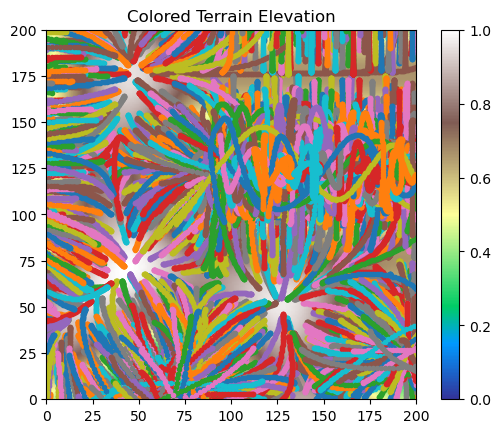

In [111]:
fig, ax = plt.subplots()

map = ax.imshow(normalized_terrain, cmap='terrain')
plt.colorbar(map, ax = ax)
ax.set_title("Colored Terrain Elevation")
ax.set(xlim = (0,200), ylim = (0,200))

for path in paths:
    path_x, path_y = [a[1] for a in path],[a[0] for a in path]

    ax.plot(path_x,path_y, ".")